In [2]:
import matplotlib.pyplot as plt
import keras_ocr
import os
import pytesseract
from PIL import Image
from pytesseract import Output

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5


In [3]:
img_dir = os.getenv('HOME')+'/aiffel/ocr_python/test'
file_list = os.listdir(img_dir)
file_list

['test4.png', 'test3.png', 'test1.png', 'test2.png']

## KERAS-OCR

In [4]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [5]:
images = [keras_ocr.tools.read(os.path.join(img_dir, file)) for file in file_list]
prediction_groups = [pipeline.recognize([os.path.join(img_dir, file)]) for file in file_list]

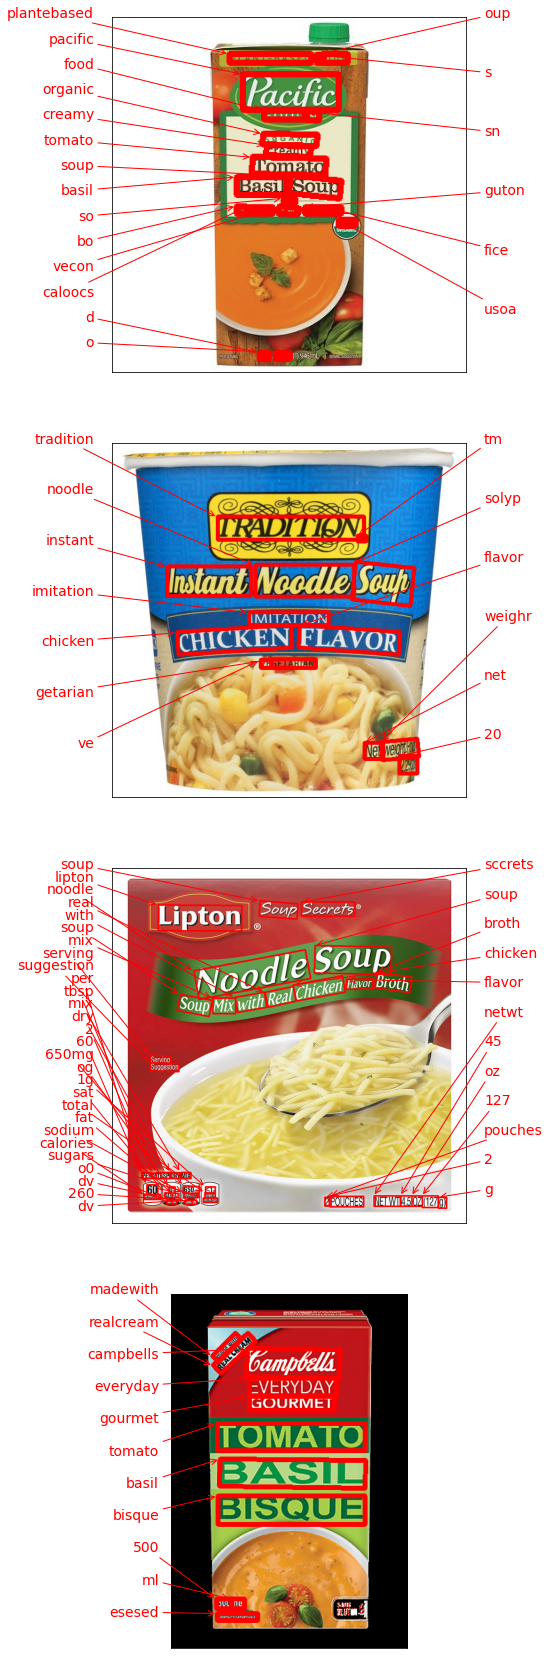

In [6]:
fig, axs = plt.subplots(nrows=len(images), figsize=(15, 30))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

## Tesseract

In [7]:
def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [8]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [9]:
work_dir = os.getenv('HOME') + '/aiffel/ocr_python/Cropped'

for file in file_list:
    print(f"\n[[{file}]]\n")
    img_file_path = img_dir + f'/{file}'
    try:
        cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
        recognize_images(cropped_image_path_list)
    except:
        print(f'검출 불가 파일 : {file}')


[[test4.png]]

ORSANT SG

Lreaiily

‘Lomato

—

basil

Soup

rsony


Done

[[test3.png]]

LATA



TIE

Mlror//-

BLOT

IMITATION

CHICKEN

FLAVOR

|

VEE ART AN

a

Done

[[test1.png]]

ee eT ee EoEoEoEEEEEEEEEEEEOEOEOEOEOEOOOOOOOeeeeeeeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEe__eee ee _—Oeeeeeeeeeeeeeeeee eee ee ee GG E——— eee eee. ee ee


"sons. ' i


.

—


~

SS

.

d

y

PER

2

TBSP

RY

VITA

3


[=


2? POUCHES

NET WT 4.5 OZ (12/

()

Done

[[test2.png]]

+

i

if}

EVERY AY

(Z,0URMET

=

Done


## 마치며
* 케라스는 높은 인식률을 나타냄.
    + 이미지 상으로 봤을 때, 사람이 잘 인식하지 못하는 글자조차 완벽하게 인식해냄.
* 반면, 테서렉트는 낮은 인식률을 보여줌.
    + 누가 봐도 글자인 것을 잘 인식하지 못함.
* 구글은 계정을 할당받아서 해봐야 하기 때문에 결과는 잘 모르겠지만, 결과적으로 봤을 때 케라스가 이미지 검출은 좋은 결과를 도출.